In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
same_df = pd.read_csv('/content/drive/MyDrive/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/one_hot_int.csv')

In [4]:
same_df['Covid19'] = same_df['Covid19'].apply(lambda x: 1 if x else 0)
int_df['Covid19'] = int_df['Covid19'].apply(lambda x: 1 if x else 0)

In [5]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

In [6]:
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

In [7]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'SE_Foreign',
            'US_Inflation', 'KR_Inflation', 'US_10', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',]
target = ['Close']

In [8]:
X_same = same_df[features]
y_same = same_df[target]

X_int = int_df[features]
y_int = int_df[target]

In [9]:
X_train_same, X_test_same, y_train_same, y_test_same = train_test_split(
    X_same, y_same, test_size=0.2, random_state=42
)

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_int, y_int, test_size=0.2, random_state=42
)

In [10]:
#same 현재 설정은 모두 기본값
model_same = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model_same.fit(X_train_same, y_train_same)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred_same = model_same.predict(X_test_same)
mse_same = mean_squared_error(y_test_same, y_pred_same)
mae_same = mean_absolute_error(y_test_same, y_pred_same)
rmse_same = np.sqrt(mean_squared_error(y_test_same, y_pred_same))

print(f"same_df MSE: {mse_same}")
print(f"same_df MAE: {mae_same}")
print(f"same_df RMSE: {rmse_same}")

same_df MSE: 8.211960644115741e-05
same_df MAE: 0.006146459698160897
same_df RMSE: 0.00906198689257259


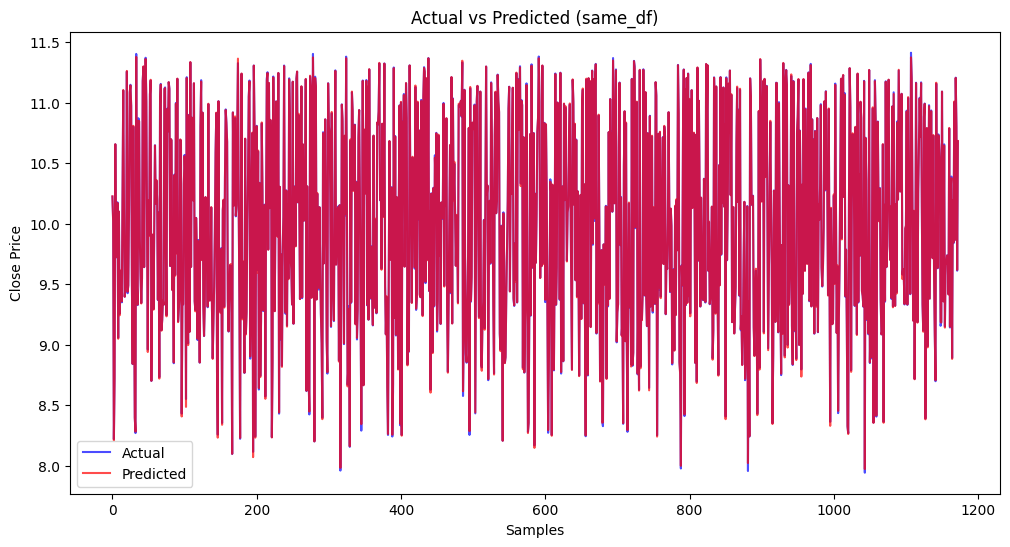

In [12]:
import matplotlib.pyplot as plt

#same_df
plt.figure(figsize=(12, 6))
plt.plot(y_test_same.values, label="Actual", color='blue', alpha=0.7)
plt.plot(y_pred_same, label="Predicted", color='red', alpha=0.7)
plt.title("Actual vs Predicted (same_df)")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()

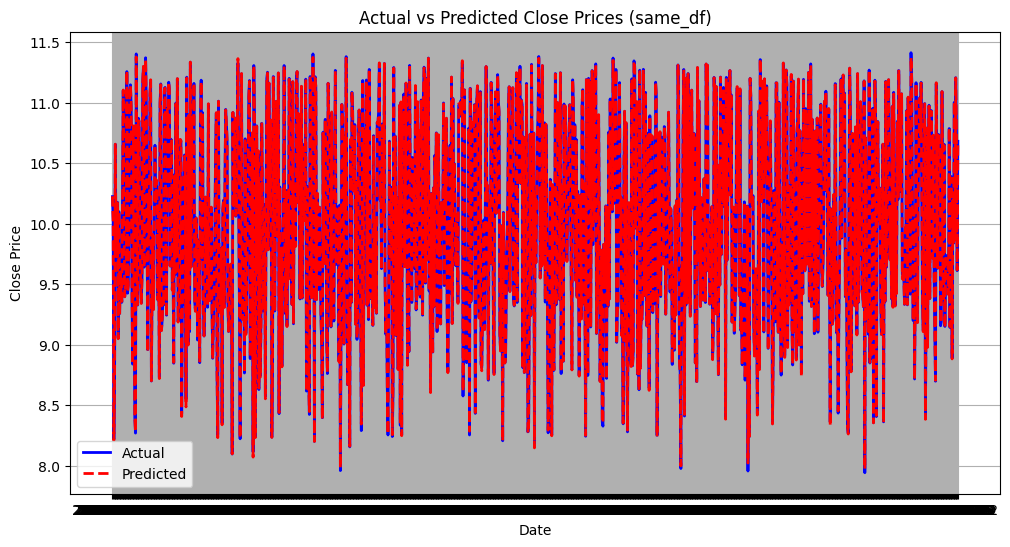

In [13]:
# Plot actual vs predicted values for same_df
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test_same.index, y_test_same.values, label="Actual", color="blue", linewidth=2)

# Plot predicted values
plt.plot(y_test_same.index, y_pred_same, label="Predicted", color="red", linestyle="--", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices (same_df)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


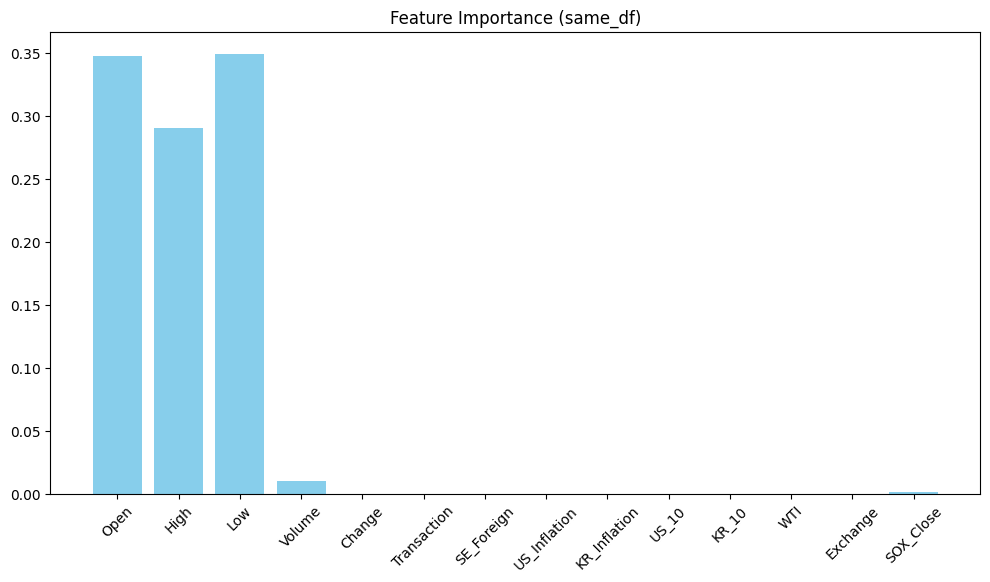

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(features, model_same.feature_importances_, color='skyblue')
plt.title("Feature Importance (same_df)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
?????

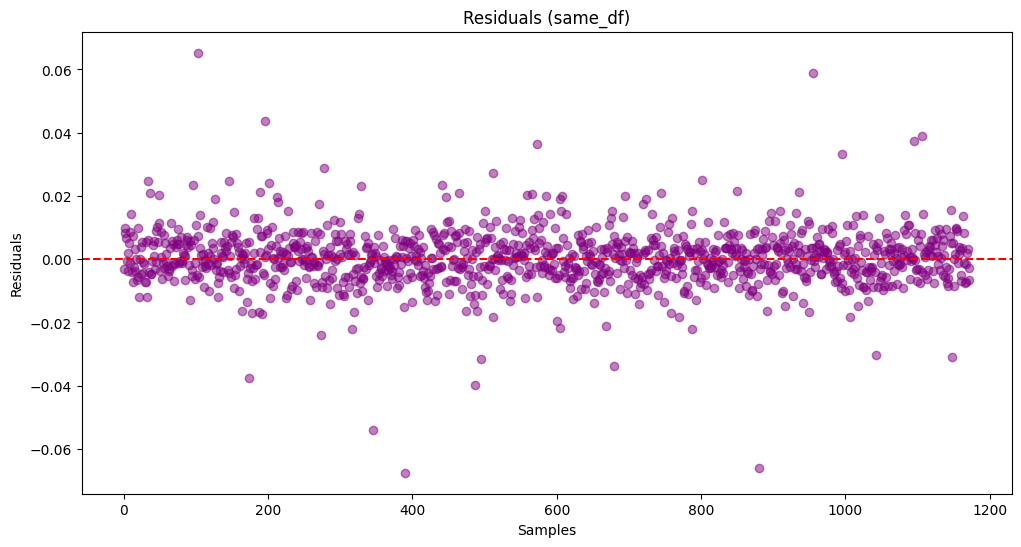

In [16]:
residuals_same = y_test_same.values.flatten() - y_pred_same

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals_same)), residuals_same, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (same_df)")
plt.xlabel("Samples")
plt.ylabel("Residuals")
plt.show()

In [17]:
#int
model_int = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model_int.fit(X_train_int, y_train_int)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
y_pred_int = model_int.predict(X_test_int)
mse_int = mean_squared_error(y_test_int, y_pred_int)
mae_int = mean_absolute_error(y_test_int, y_pred_int)
rmse_int = np.sqrt(mean_squared_error(y_test_int, y_pred_int))

print(f"int_df MSE: {mse_int}")
print(f"int_df MAE: {mae_int}")
print(f"int_df RMSE: {rmse_int}")

int_df MSE: 8.783772571093716e-05
int_df MAE: 0.006182505295525832
int_df RMSE: 0.009372178279937762


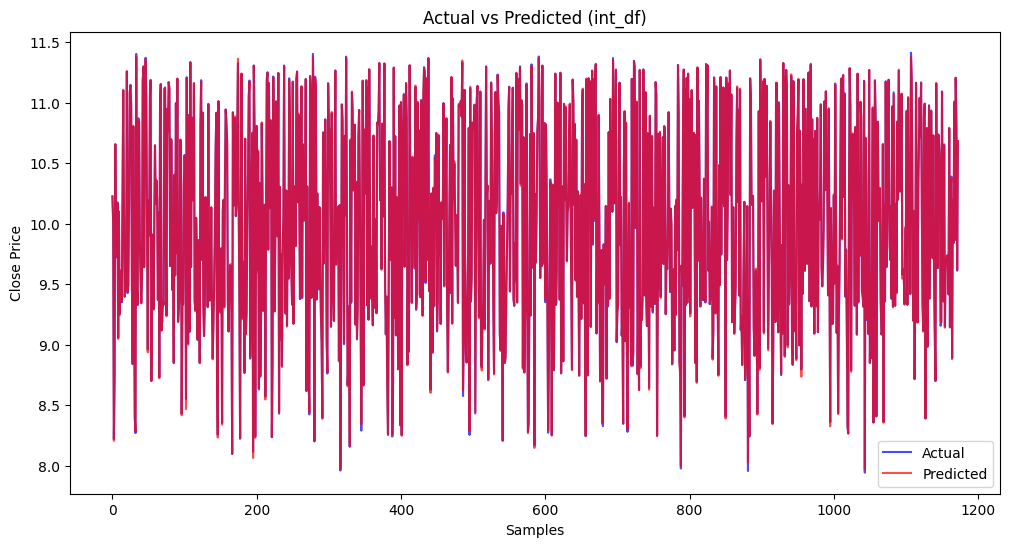

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_int.values, label="Actual", color='blue', alpha=0.7)
plt.plot(y_pred_int, label="Predicted", color='red', alpha=0.7)
plt.title("Actual vs Predicted (int_df)")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()

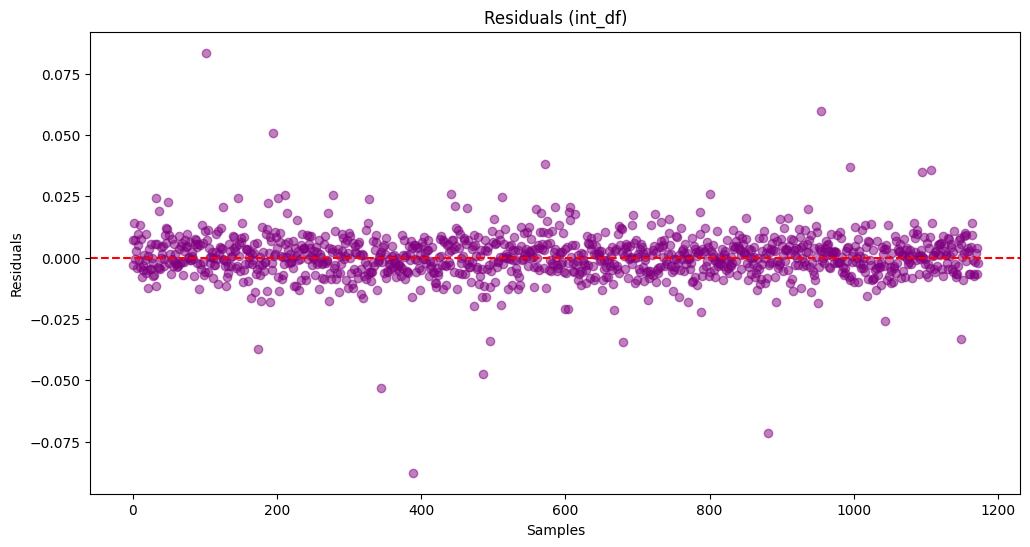

In [20]:
residuals_int = y_test_int.values.flatten() - y_pred_int

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals_int)), residuals_int, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (int_df)")
plt.xlabel("Samples")
plt.ylabel("Residuals")
plt.show()

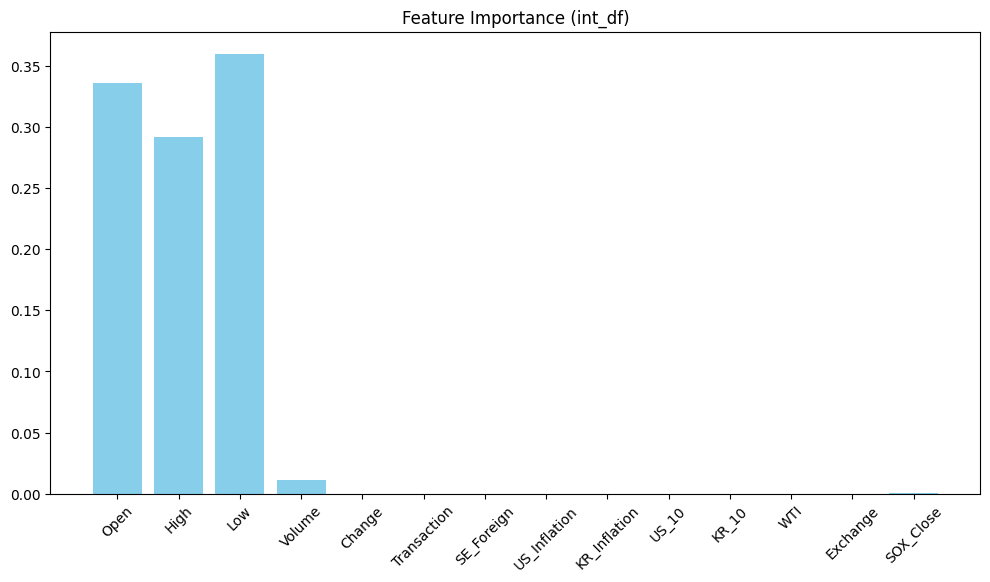

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(features, model_int.feature_importances_, color='skyblue')
plt.title("Feature Importance (int_df)")
plt.xticks(rotation=45)
plt.show()

In [23]:
X_train_same, X_test_same, y_train_same, y_test_same = train_test_split(
    X_same, y_same, test_size=0.2, random_state=42
)

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_int, y_int, test_size=0.2, random_state=42
)

In [22]:
model_same = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model_same.fit(X_train_same, y_train_same)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
for lr in learning_rates:
    model = xgb.XGBRegressor(learning_rate=lr, n_estimators=100, random_state=42)
    model.fit(X_train_same, y_train_same)
    y_pred = model.predict(X_test_same)
    rmse = np.sqrt(mean_squared_error(y_test_same, y_pred))
    print(f"Learning Rate: {lr}, RMSE: {rmse}")

Learning Rate: 0.01, RMSE: 0.31268408437906997
Learning Rate: 0.05, RMSE: 0.010919920060307321
Learning Rate: 0.1, RMSE: 0.009500782412047288
Learning Rate: 0.2, RMSE: 0.010138086671192963
Learning Rate: 0.3, RMSE: 0.010849313735430086


In [41]:
# 데이터 형태 확인
print(X_train_same.shape)
print(y_train_same.shape)

# 결측값 확인
print(X_train_same.isnull().sum())
print(y_train_same.isnull().sum())

(4692, 14)
(4692, 1)
Open            0
High            0
Low             0
Volume          0
Change          0
Transaction     0
SE_Foreign      0
US_Inflation    0
KR_Inflation    0
US_10           0
KR_10           0
WTI             0
Exchange        0
SOX_Close       0
dtype: int64
Close    0
dtype: int64


In [42]:
print(type(X_train_same))  # pandas.DataFrame이어야 함
print(type(y_train_same))  # pandas.Series 또는 pandas.DataFrame이어야 함

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [48]:
y_train_same = y_train_same.squeeze()  # 1차원으로 변환
print(y_train_same.shape)

(4692,)


In [50]:
from sklearn.model_selection import GridSearchCV
#트리 depth
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7]
}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

grid.fit(X_train_same, y_train_same)
print(f"Best parameters: {grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid.best_score_)}")

Best parameters: {'max_depth': 7, 'min_child_weight': 1}
Best RMSE: 0.009681940388684437


In [51]:
param_grid = {'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(max_depth=grid.best_params_['max_depth'], min_child_weight=grid.best_params_['min_child_weight'], random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

grid.fit(X_train_same, y_train_same)
print(f"Best parameters: {grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid.best_score_)}")


Best parameters: {'gamma': 0}
Best RMSE: 0.01171430835455588


In [29]:
'''param_grid = {'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(max_depth=5, min_child_weight=3, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3  # 교차 검증 폴드 수
)

grid.fit(X_train_same, y_train_same)

print(f"Best parameters: {grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid.best_score_)}")'''

Best parameters: {'gamma': 0}
Best RMSE: 0.019003830651375


In [53]:
best_max_depth = 7
best_min_child_weight = 1
best_gamma = 0

param_grid = {
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

sampling_grid = GridSearchCV(
    estimator=xgb.XGBRegressor(
        max_depth=best_max_depth,
        min_child_weight=best_min_child_weight,
        gamma=best_gamma,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3  # 교차 검증 폴드 수
)

sampling_grid.fit(X_train_same, y_train_same)
print(f"Best parameters: {sampling_grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-sampling_grid.best_score_)}")


Best parameters: {'colsample_bytree': 1.0, 'subsample': 0.9}
Best RMSE: 0.011659191070228005


In [37]:
best_max_depth = 7
best_min_child_weight = 1
best_gamma = 0
best_subsample = 1.0
best_colsample_bytree = 0.9

param_grid = {
    'alpha': [0, 0.1, 1, 10], #L1
    'lambda': [0, 0.1, 1, 10] #L2
}

regularization_grid = GridSearchCV(
    estimator=xgb.XGBRegressor(
        max_depth=best_max_depth,
        min_child_weight=best_min_child_weight,
        gamma=best_gamma,
        subsample=best_subsample,
        colsample_bytree=best_colsample_bytree,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3  # 교차 검증 폴드 수
)

regularization_grid.fit(X_train_same, y_train_same)
print(f"Best parameters: {regularization_grid.best_params_}")
print(f"Best RMSE: {np.sqrt(-regularization_grid.best_score_)}")

Best parameters: {'alpha': 0, 'lambda': 0}
Best RMSE: 0.009890582400349002


In [57]:
final_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=1.0,
    colsample_bytree=0.9, #1.0도?
    alpha=0,
    reg_lambda=0,
    random_state=42
)

final_model.fit(X_train_same, y_train_same)



XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [58]:
y_pred = final_model.predict(X_test_same)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_same, y_pred))
mae = mean_absolute_error(y_test_same, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.00876317194903393
MAE: 0.0058574899569932394


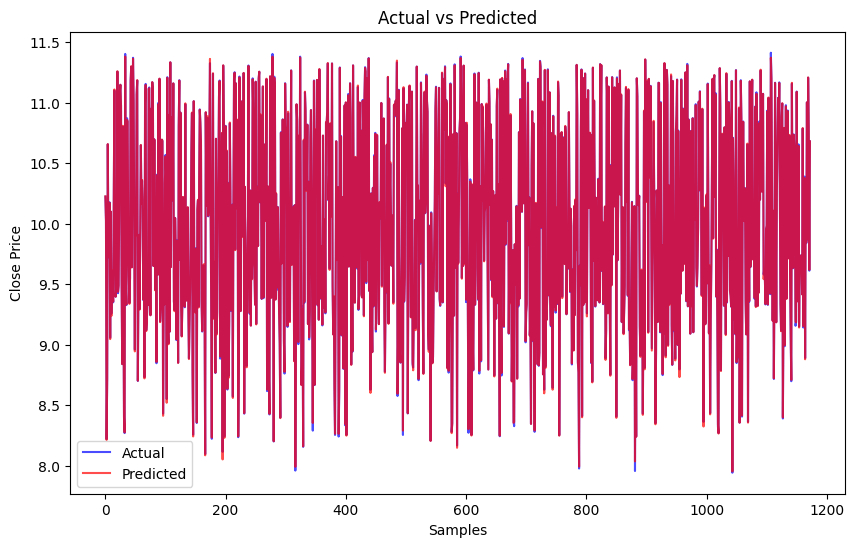

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_same.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted", color="red", alpha=0.7)
plt.title("Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [62]:
#^^